In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("curriculum-access.txt", sep=" ", names=["date", "time", "page", "user", "cohort", "ip"])
df["timestamp"] = df.date + " " + df.time
df.drop(columns=["date", "time"], inplace=True)
df.timestamp = pd.to_datetime(df.timestamp)
df = df.set_index("timestamp")
df = df.reset_index()
df

,timestamp,page,user,cohort,ip
0,2018-01-26 09:55:03,/,1,8.0,98.106.20.62
1,2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62
2,2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
3,2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
4,2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62
...,...,...,...,...,...
543591,2020-05-15 15:01:40,java-ii/file-io,602,56.0,48.188.241.68
543592,2020-05-15 15:01:54,9-timeseries/3-prep,582,55.0,48.135.163.38
543593,2020-05-15 15:03:37,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17
543594,2020-05-15 15:05:14,10-anomaly-detection/3-discrete-probabilistic-...,11,28.0,77.186.132.227


In [3]:
curie = df[df.cohort == 55]
curie = curie.reset_index()
curie.drop(columns=['index'], inplace=True)
curie

,timestamp,page,user,cohort,ip
0,2020-02-03 15:39:34,login,575,55.0,98.106.20.59
1,2020-02-03 15:39:35,/,576,55.0,98.106.20.59
2,2020-02-03 15:39:37,/,577,55.0,98.106.20.59
3,2020-02-03 15:39:37,login,575,55.0,98.106.20.59
4,2020-02-03 15:39:43,/,578,55.0,98.106.20.59
...,...,...,...,...,...
14247,2020-05-15 14:46:46,search/search_index.json,591,55.0,174.176.101.202
14248,2020-05-15 14:47:01,appendix/professional-development/t-block-less...,591,55.0,174.176.101.202
14249,2020-05-15 14:49:50,appendix/professional-development/vertical-resume,591,55.0,174.176.101.202
14250,2020-05-15 15:00:58,9-timeseries/4-explore,588,55.0,71.95.165.84


In [4]:
ip_addresses = df.groupby(["user"])["ip"].agg(["count", "nunique"])
ip_addresses

,count,nunique
user,,
1,5437,27
2,1541,12
3,1562,25
4,692,11
5,1701,4
...,...,...
646,41,1
647,10,3
648,488,1


In [5]:
# make the object
scaler = MinMaxScaler()

# fit the object
scaler.fit(ip_addresses)

# use the object
ip_adresses = scaler.transform(ip_addresses)

ip_adresses

array([[4.91323210e-01, 1.76870748e-01],
       [1.39190166e-01, 7.48299320e-02],
       [1.41088214e-01, 1.63265306e-01],
       ...,
       [4.40166305e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [9.03832249e-05, 0.00000000e+00]])

In [6]:
columns = list(ip_addresses.columns)
scaled_columns = ["scaled_" + col for col in columns]
scaled_columns

['scaled_count', 'scaled_nunique']

In [7]:
scaled_data = pd.DataFrame(ip_adresses, columns=scaled_columns)
scaled_data

,scaled_count,scaled_nunique
0,0.491323,0.176871
1,0.139190,0.074830
2,0.141088,0.163265
3,0.062455,0.068027
4,0.153651,0.020408
...,...,...
645,0.003615,0.000000
646,0.000813,0.013605
647,0.044017,0.000000
648,0.000000,0.000000


In [8]:
# make and fit the object
dbsc = DBSCAN(eps=.5, min_samples=5).fit(ip_addresses)

In [9]:
labels = dbsc.labels_
len(labels) 

650

In [10]:
ip_addresses["labels"] = dbsc.labels_
ip_addresses.labels.value_counts()

-1    632
 0      8
 1      5
 2      5
Name: labels, dtype: int64

In [11]:
ip_addresses

,count,nunique,labels
user,,,
1,5437,27,-1
2,1541,12,-1
3,1562,25,-1
4,692,11,-1
5,1701,4,-1
...,...,...,...
646,41,1,-1
647,10,3,-1
648,488,1,-1


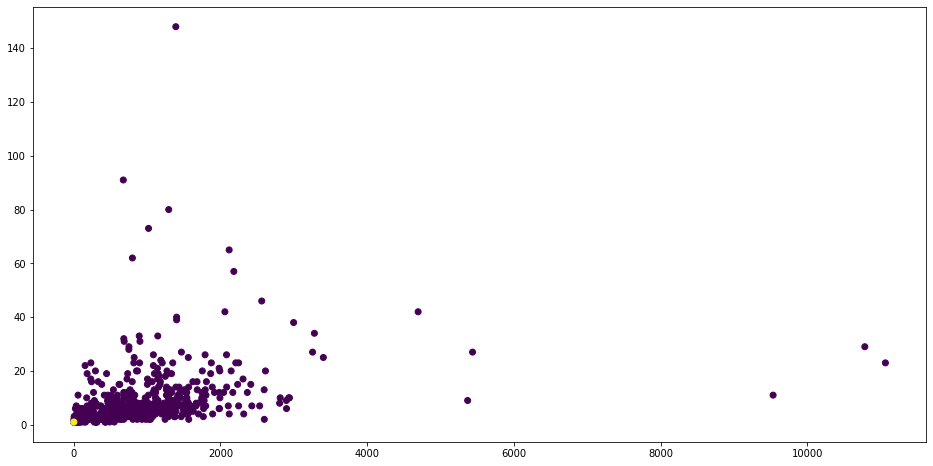

In [12]:
plt.figure(figsize=(16, 8))

plt.scatter(x=ip_addresses["count"], y=ip_addresses["nunique"], c=ip_addresses["labels"])
plt.show()

---

In [13]:
df = pd.read_csv("curriculum-access.txt", sep=" ", names=["date", "time", "page", "user", "cohort", "ip"])
df["timestamp"] = df.date + " " + df.time
df.drop(columns=["date", "time"], inplace=True)
df.timestamp = pd.to_datetime(df.timestamp)
df = df.set_index("timestamp")
df

,page,user,cohort,ip
timestamp,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62
...,...,...,...,...
2020-05-15 15:01:40,java-ii/file-io,602,56.0,48.188.241.68
2020-05-15 15:01:54,9-timeseries/3-prep,582,55.0,48.135.163.38
2020-05-15 15:03:37,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17


In [14]:
df = pd.DataFrame(df.resample("H").user.agg(["count", "nunique"]))
df

,count,nunique
timestamp,,
2018-01-26 09:00:00,11,5
2018-01-26 10:00:00,63,20
2018-01-26 11:00:00,101,28
2018-01-26 12:00:00,28,12
2018-01-26 13:00:00,54,14
...,...,...
2020-05-15 11:00:00,120,40
2020-05-15 12:00:00,110,33
2020-05-15 13:00:00,140,38


In [15]:
df = df.reset_index()
df

,timestamp,count,nunique
0,2018-01-26 09:00:00,11,5
1,2018-01-26 10:00:00,63,20
2,2018-01-26 11:00:00,101,28
3,2018-01-26 12:00:00,28,12
4,2018-01-26 13:00:00,54,14
...,...,...,...
20162,2020-05-15 11:00:00,120,40
20163,2020-05-15 12:00:00,110,33
20164,2020-05-15 13:00:00,140,38
20165,2020-05-15 14:00:00,122,35


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20167 entries, 0 to 20166
Data columns (total 3 columns):
timestamp    20167 non-null datetime64[ns]
count        20167 non-null int64
nunique      20167 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 472.8 KB


In [17]:
df.drop(columns="timestamp", inplace=True)
df

,count,nunique
0,11,5
1,63,20
2,101,28
3,28,12
4,54,14
...,...,...
20162,120,40
20163,110,33
20164,140,38
20165,122,35


In [18]:
daily_pages = df
daily_pages

,count,nunique
0,11,5
1,63,20
2,101,28
3,28,12
4,54,14
...,...,...
20162,120,40
20163,110,33
20164,140,38
20165,122,35


In [19]:
# scaling

# make object
scaler = MinMaxScaler()

# fit object
scaler.fit(daily_pages)

# use object
scaled_values = scaler.transform(daily_pages)

scaled_values

array([[0.01716069, 0.06666667],
       [0.09828393, 0.26666667],
       [0.1575663 , 0.37333333],
       ...,
       [0.21840874, 0.50666667],
       [0.19032761, 0.46666667],
       [0.0124805 , 0.09333333]])

In [20]:
dbsc = DBSCAN(eps=.5, min_samples=5).fit(scaled_values)
labels = dbsc.labels_

In [21]:
columns = list(df.columns)
scaled_columns = ["scaled_" + col for col in columns]
scaled_columns

['scaled_count', 'scaled_nunique']

In [22]:
scaled_df = pd.DataFrame(scaled_values, columns=scaled_columns)
scaled_df

,scaled_count,scaled_nunique
0,0.017161,0.066667
1,0.098284,0.266667
2,0.157566,0.373333
3,0.043682,0.160000
4,0.084243,0.186667
...,...,...
20162,0.187207,0.533333
20163,0.171607,0.440000
20164,0.218409,0.506667
20165,0.190328,0.466667


In [23]:
scaled_df["labels"] = labels
scaled_df

,scaled_count,scaled_nunique,labels
0,0.017161,0.066667,0
1,0.098284,0.266667,0
2,0.157566,0.373333,0
3,0.043682,0.160000,0
4,0.084243,0.186667,0
...,...,...,...
20162,0.187207,0.533333,0
20163,0.171607,0.440000,0
20164,0.218409,0.506667,0
20165,0.190328,0.466667,0


In [24]:
scaled_df.labels.value_counts()

0    20167
Name: labels, dtype: int64

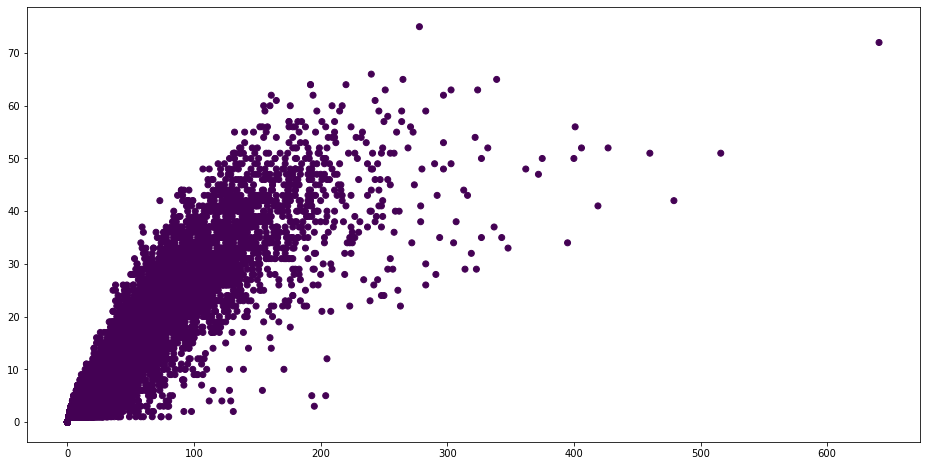

In [25]:
plt.figure(figsize=(16, 8))

plt.scatter(daily_pages["count"], daily_pages["nunique"], c=scaled_df.labels)
plt.show()

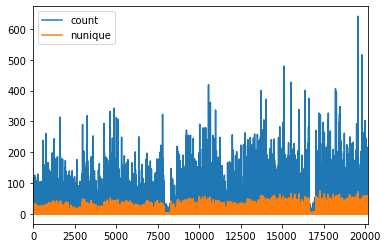

In [26]:
daily_pages.plot()